In [55]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import random


In [56]:
'''Setting the backend to 'Agg' is often used in scenarios where you are generating plots in a script or program
 that doesn't have a graphical user interface (GUI)
 or when running scripts on servers where displaying graphical plots isn't possible or necessary.'''

import matplotlib
matplotlib.use('Agg')

In [57]:
ap = argparse.ArgumentParser()

In [58]:
# ap.add_argument('-d', "--dataset", required=True, help='path to input dataset')
# ap.add_argument('-m', '--model', required=True, help='path to output model')

In [122]:
import argparse
import sys

# Create an ArgumentParser object
ap = argparse.ArgumentParser()

# Add the plot argument
ap.add_argument('-p', '--plot', type=str, default='plot.png', help='path to output accuracy/loss plot')

# Parse the command-line arguments (simulated)
args = ap.parse_args(["-p", "/content/plot.png"])

# Access the value of the 'plot' argument
plot_path = args.plot
print(f"Plot path: {plot_path}")


Plot path: /content/plot.png


In [76]:
EPOCHS = 30      #number_of_epochs
INIT_LR = 1e-3   #initial learning rate
BS = 32          #Batch size

In [77]:
#initialize the data and labels
print("Loading images....")
data = []
labels = []
imagePaths = []


Loading images....


In [78]:
#image paths and shuffle them
# imagePaths = sorted(list(paths.list_images(args['dataset'])))

In [79]:
notes= '/content/drive/MyDrive/Colab_Notebooks/Project_delete/notes'
not_notes= '/content/drive/MyDrive/Colab_Notebooks/Project_delete/not_notes'

In [80]:
for filename in os.listdir(notes): # Gets details of everyfile in path mentioned
		img = os.path.join(notes,filename) # For each filename in the directory, to create a full file path by joining the notes directory path and the filename
		imagePaths.append(img) # Appends all the paths into a list

In [81]:
for filename in os.listdir(not_notes):
		img = os.path.join(not_notes,filename)
		imagePaths.append(img)

In [82]:
random.seed(42)  # Setting random state for shuffling
random.shuffle(imagePaths) # Shuffling the image paths

In [83]:
for path in imagePaths:

    img = cv2.imread(path)  # A computer vision function used for reading the images
    img = cv2.resize(img,(28,28)) # Resizing the imges for entering specific input for images while model building which is considered as a common measure for all images
    img = img_to_array(img) # Converting the images to numerical matrice format
    data.append(img)

    label = path.split(os.path.sep)[-2]  # In a path like "C:\images\notes\image1.jpg," the second-to-last part is "notes." It's like counting the parts in the path from right to left.
    label = 1 if label == 'notes' else 0
    labels.append(label)

In [84]:
data = np.array(data,dtype='float')/255.0   # Making sure the values stay between 0 and 1
labels = np.array(labels)
(X_train, X_test, y_train, y_test) = train_test_split(data,labels,test_size=0.25,random_state=42)


In [85]:
#converting int arrays to vectors
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [86]:
#data augmentation
datagen= ImageDataGenerator(
    rotation_range= 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True,
    fill_mode= 'nearest'
)

In [87]:
%run lenet.ipynb

In [88]:
%load lenet.ipynb

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from keras import backend as K

In [90]:
#initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28,height=28,depth=3,classes=2)

import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate= 1e-4,
    decay_steps=10000,
    decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

[INFO] compiling model...


In [93]:
#train the network
print('[INFO] training network...')
H = model.fit_generator(datagen.flow(X_train, y_train,batch_size=BS),
	validation_data=(X_test, y_test), steps_per_epoch=len(X_train)//BS,
	epochs=EPOCHS, verbose=1)

[INFO] training network...
Epoch 1/30


<ipython-input-93-5af968a6eb36>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(datagen.flow(X_train, y_train,batch_size=BS),


30/30 [==============================] - 6s 186ms/step - loss: 0.3406 - accuracy: 0.8621 - val_loss: 0.3618 - val_accuracy: 0.8727
Epoch 2/30
30/30 [==============================] - 6s 183ms/step - loss: 0.3151 - accuracy: 0.8677 - val_loss: 0.4566 - val_accuracy: 0.8091
Epoch 3/30
30/30 [==============================] - 6s 178ms/step - loss: 0.3152 - accuracy: 0.8642 - val_loss: 0.3604 - val_accuracy: 0.8667
Epoch 4/30
30/30 [==============================] - 5s 179ms/step - loss: 0.3236 - accuracy: 0.8652 - val_loss: 0.2372 - val_accuracy: 0.9121
Epoch 5/30
30/30 [==============================] - 5s 175ms/step - loss: 0.3189 - accuracy: 0.8715 - val_loss: 0.2843 - val_accuracy: 0.8939
Epoch 6/30
30/30 [==============================] - 7s 233ms/step - loss: 0.3239 - accuracy: 0.8579 - val_loss: 0.2410 - val_accuracy: 0.9000
Epoch 7/30
30/30 [==============================] - 5s 173ms/step - loss: 0.3243 - accuracy: 0.8683 - val_loss: 0.2833 - val_accuracy: 0.8909
Epoch 8/30
30/30 

In [94]:
print('[INFO] serializing network...')
model.save('mymodel.h5')

[INFO] serializing network...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [95]:
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, N), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, N), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, N), H.history['val_accuracy'], label='val_acc')
plt.title("Training loss and accuracy on Notes/Not Notes")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc='lower left')
plt.savefig("plot.png")  # Specify the desired filename here


In [96]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2


In [223]:
import argparse

# Create an ArgumentParser object
ap = argparse.ArgumentParser()

# Add the image argument
ap.add_argument("-i", "--image", required=False,
    help="path to input image")

# Provide the image path here
image_path = "/content/drive/MyDrive/Colab_Notebooks/Project_delete/not_notes/IMG-20230810-WA0001.jpg"

# Access the value of the 'image' argument using dot notation
args = ap.parse_known_args()[0]
args.image = image_path

# Now you can use the 'image_path' variable in your script
if args.image:
    print(f"Image path: {args.image}")
else:
    print("No image path provided.")

Image path: /content/drive/MyDrive/Colab_Notebooks/Project_delete/not_notes/IMG-20230810-WA0001.jpg


In [224]:
import cv2

# Read the image using the provided image path
image = cv2.imread(image_path)

if image is not None:
    orig = image.copy()
    # The rest of your image processing code goes here
else:
    print("Failed to load the image.")

In [225]:
image = cv2.resize(image,(28,28))
image = image.astype('float')/255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [226]:
model = load_model('mymodel.h5')


In [227]:
(not_notes, notes) = model.predict(image)[0]


1/1 [==============================] - 0s 73ms/step


In [228]:
label = 'notes' if notes > not_notes else "not_notes"
proba = notes if notes > not_notes else not_notes
label = "{}: {:.2f}%".format(label,proba*100)

In [229]:
output = imutils.resize(orig,width=400)
cv2.putText(output,label,(10,25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

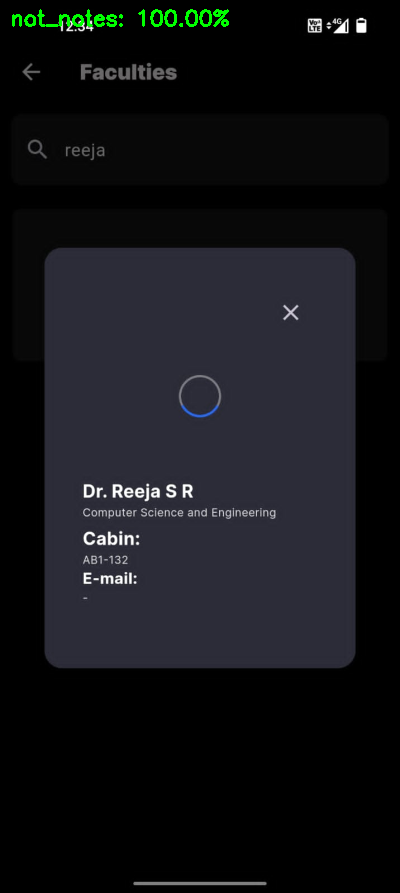

-1

In [230]:
from google.colab.patches import cv2_imshow

# Display the image using cv2_imshow
cv2_imshow(output)
cv2.waitKey(0)